In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_pickle('./Discriptor_hfo2.pkl')
dotants = pd.read_pickle('./probe_data.pkl')
dot = dotants['dopant']
df

,structure,name
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif
...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif


In [5]:
dot = np.unique(dot)
dot = dot.tolist()
dot.remove('Hf')
print(dot)

['Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'C', 'Ca', 'Cd', 'Ce', 'Co', 'Cr', 'Cs', 'Cu', 'Fe', 'Ga', 'Ge', 'H', 'Hg', 'In', 'Ir', 'K', 'La', 'Li', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Ni', 'Os', 'P', 'Pb', 'Pd', 'Pt', 'Rb', 'Re', 'Rh', 'Ru', 'Sb', 'Sc', 'Si', 'Sn', 'Sr', 'Ta', 'Tc', 'Ti', 'Tl', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr']


In [6]:
labels_true = pd.read_pickle('./data_labels/labels_hfo2.pkl')
labels_true['labels_0_4'] = labels_true['labels_0_4'].replace({'m': 0,
                                                        'p-o': 1,
                                                        'o': 2,
                                                        't': 3,
                                                        'unknown': 4})

y_true = labels_true['labels_0_4']


In [7]:
from matminer.featurizers.structure import PartialRadialDistributionFunction

prdf = PartialRadialDistributionFunction(cutoff = 20, bin_size = 0.5, include_elems=['Hf', 'O'], exclude_elems=dot)
df = prdf.fit_featurize_dataframe(df, 'structure')
df

,structure,name,Hf-Hf PRDF r=0.00-0.50,Hf-Hf PRDF r=0.50-1.00,Hf-Hf PRDF r=1.00-1.50,Hf-Hf PRDF r=1.50-2.00,Hf-Hf PRDF r=2.00-2.50,Hf-Hf PRDF r=2.50-3.00,Hf-Hf PRDF r=3.00-3.50,Hf-Hf PRDF r=3.50-4.00,...,O-O PRDF r=15.00-15.50,O-O PRDF r=15.50-16.00,O-O PRDF r=16.00-16.50,O-O PRDF r=16.50-17.00,O-O PRDF r=17.00-17.50,O-O PRDF r=17.50-18.00,O-O PRDF r=18.00-18.50,O-O PRDF r=18.50-19.00,O-O PRDF r=19.00-19.50,O-O PRDF r=19.50-20.00
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.092170,0.047391,...,0.055107,0.062309,0.062979,0.060304,0.052998,0.058736,0.069105,0.066106,0.044625,0.061557
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.100902,0.043016,...,0.064922,0.052085,0.072264,0.054968,0.053900,0.061388,0.062251,0.059881,0.061669,0.056598
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.086349,0.066347,...,0.062933,0.064374,0.063205,0.062147,0.060301,0.058499,0.064611,0.068638,0.056704,0.057656
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.011643,0.122488,...,0.069220,0.055092,0.069665,0.067288,0.045109,0.060441,0.079498,0.059499,0.058999,0.052926
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.090230,0.045204,...,0.055043,0.062229,0.062263,0.060197,0.054886,0.056100,0.069284,0.066318,0.045014,0.061532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.030077,0.113009,...,0.066034,0.054370,0.070663,0.066082,0.044792,0.058594,0.083739,0.055906,0.056475,0.059160
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.082710,0.040966,...,0.057523,0.055974,0.065088,0.062572,0.049204,0.056573,0.061132,0.068242,0.050168,0.051587
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.086470,0.038141,...,0.061073,0.055172,0.064222,0.061119,0.050207,0.055974,0.059758,0.065695,0.056637,0.053984
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif,0.0,0.0,0.0,0.0,0.0,0.0,0.056393,0.088995,...,0.067788,0.054210,0.066595,0.062041,0.052881,0.057836,0.064327,0.064762,0.061549,0.052403


In [8]:
pd.to_pickle(df, './df_prdf_hfo2.pkl')

In [9]:
from sklearn.utils import shuffle
X = df.iloc[:,2:]
X, y_true = shuffle(X, y_true, random_state=0)
X = X.values

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
neigh = KNeighborsClassifier(n_neighbors=9)

In [18]:
scores = cross_val_score(neigh, X, y_true, cv=10, scoring='accuracy')
print(scores.mean())

0.9263711520365641


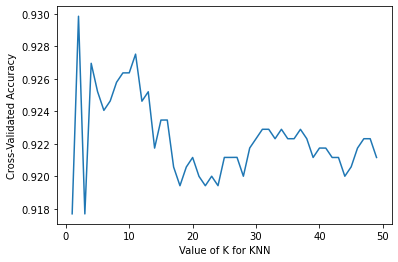

In [19]:
import matplotlib.pyplot as plt
# choose k between 1 to 31
k_range = range(1, 50)

k_scores = []# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y_true, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()